In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Tdata=pd.read_csv('TelcoCustomerChurn.csv')
Tdata.shape

(7043, 21)

In [3]:
def display_all(df):
    with pd.option_context("display.max_columns",50):
        display(df)

In [4]:
display_all(Tdata.head())

,customerID,gender,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
def df_summary(df):
    df_U=df.nunique()
    df_M=df.isnull().sum()
    df_I=df.dtypes
    
    df_U=df_U.to_frame().reset_index()
    df_M=df_M.to_frame().reset_index()
    df_I=df_I.to_frame().reset_index()
    
    df_U=df_U.rename(columns= {0: "Unique Data"})
    df_M=df_M.rename(columns= {0: "Missing Data"})
    df_I=df_I.rename(columns= {0: "Data types"})
    
    Output = pd.merge(pd.merge(df_M,df_U,on="index"),df_I,on="index")
    
    return Output

In [6]:
df_summary(Tdata)

,index,Missing Data,Unique Data,Data types
0,customerID,0,7043,object
1,gender,0,2,object
2,V1,0,2,int64
3,V2,0,2,object
4,V3,0,2,object
5,V4,0,73,int64
6,V5,0,2,object
7,V6,0,3,object
8,V7,0,3,object
9,V8,0,3,object


In [7]:
# to convert Object into Float

Tdata.V18=pd.to_numeric(Tdata.V18, errors="coerce")
Tdata.V18.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: V18, dtype: float64

In [8]:
Tdata.V18.isnull().sum()

11

In [9]:
Tdata['V18']=Tdata['V18'].fillna(Tdata['V18']).mean()

In [10]:
Tdata.isnull().sum()

customerID    0
gender        0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
Churn         0
dtype: int64

In [11]:
print(Tdata.Churn.value_counts())


No     5174
Yes    1869
Name: Churn, dtype: int64


C:\Users\MY PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

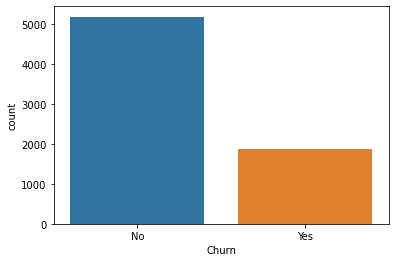

In [12]:
sns.countplot(Tdata['Churn'])

In [13]:
Tdata.drop('customerID',axis=1,inplace=True)

In [14]:
Tdata.columns

Index(['gender', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'Churn'],
      dtype='object')

In [15]:
#Seperating Numerical and Categorical features

Num_cols=Tdata.select_dtypes(include=['float64','int64']).columns.tolist()

Cat_cols=Tdata.select_dtypes(include=['object']).columns.tolist()

In [16]:
Num_cols

['V1', 'V4', 'V17', 'V18']

In [17]:
Cat_cols

['gender',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'Churn']

In [19]:
Tdata[Num_cols].describe()

,V1,V4,V17,V18
count,7043.000000,7043.000000,7043.000000,7.043000e+03
mean,0.162147,32.371149,64.761692,2.283300e+03
std,0.368612,24.559481,30.090047,2.965163e-10
min,0.000000,0.000000,18.250000,2.283300e+03
25%,0.000000,9.000000,35.500000,2.283300e+03
50%,0.000000,29.000000,70.350000,2.283300e+03
75%,0.000000,55.000000,89.850000,2.283300e+03
max,1.000000,72.000000,118.750000,2.283300e+03


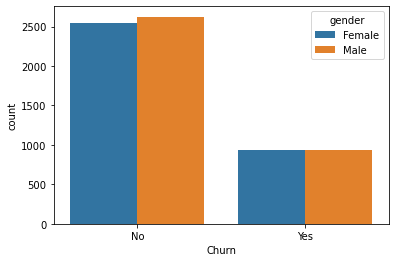

In [20]:
sns.countplot(x='Churn',hue='gender',data=Tdata);

In [23]:
Binary_class = Tdata[Cat_cols].nunique()[Tdata[Cat_cols].nunique() == 2].keys().tolist()
Multi_class =  Tdata[Cat_cols].nunique()[Tdata[Cat_cols].nunique() > 2].keys().tolist()
print(Binary_class)
print(Multi_class)

['gender', 'V2', 'V3', 'V5', 'V15', 'Churn']
['V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16']


In [24]:
#Label encoding Binary Columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in Binary_class:
    Tdata[i]=le.fit_transform(Tdata[i])

In [25]:
Tdata_Dummy=pd.get_dummies(Tdata[Multi_class],drop_first=True)
Tdata_Dummy.head()

,V6_No phone service,V6_Yes,V7_Fiber optic,V7_No,V8_No internet service,V8_Yes,V9_No internet service,V9_Yes,V10_No internet service,V10_Yes,...,V11_Yes,V12_No internet service,V12_Yes,V13_No internet service,V13_Yes,V14_One year,V14_Two year,V16_Credit card (automatic),V16_Electronic check,V16_Mailed check
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
final_df = pd.concat([Tdata[Num_cols],Tdata[Binary_class],Tdata_Dummy], axis=1)
final_df.shape

(7043, 31)

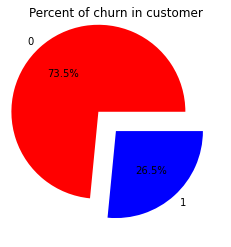

In [28]:
# Data to plot
labels =final_df['Churn'].value_counts(sort = True).index
sizes = final_df['Churn'].value_counts(sort = True)

colors = ["red","blue"]
explode = (0.3,0)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',
        shadow=False, startangle=360,)

plt.title('Percent of churn in customer')
plt.show()

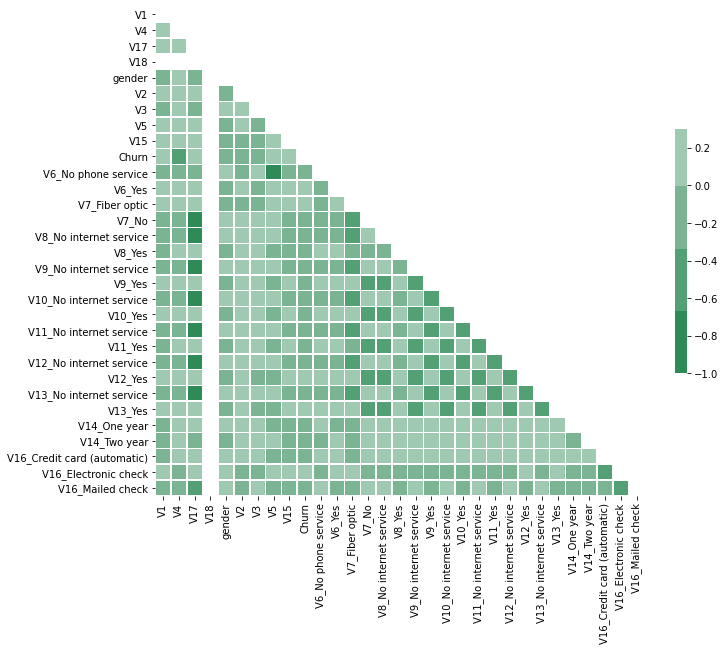

In [29]:
#Correlation
corr=final_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap=sns.light_palette("seagreen", reverse=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [30]:
from sklearn.model_selection import train_test_split
X = final_df.drop(['Churn'],axis=1)
y = final_df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

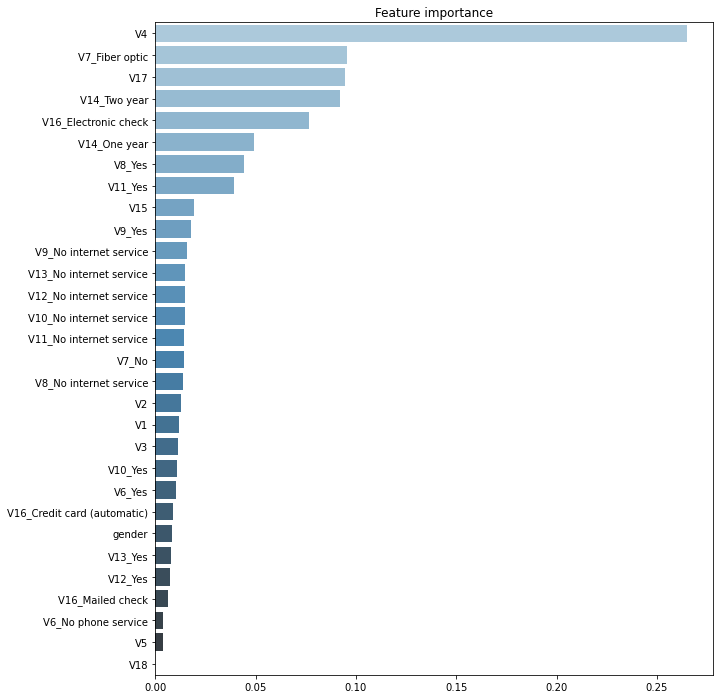

In [33]:
#Feature selection using Random Forest

from sklearn.ensemble import RandomForestClassifier
params={'random_state':0,'n_jobs':-1,'n_estimators':5000,'max_depth':8}

clf = RandomForestClassifier(**params)
clf = clf.fit(X, y)

# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

In [34]:
from sklearn.svm import SVC  

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix, classification_report

In [35]:
svc_clf=SVC(probability=True)

svc_clf.fit(X_train, y_train)

SVC(probability=True)

In [36]:
y_pred=svc_clf.predict(X_test)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1061
           1       0.00      0.00      0.00       348

    accuracy                           0.75      1409
   macro avg       0.38      0.50      0.43      1409
weighted avg       0.57      0.75      0.65      1409



C:\Users\MY PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
clf.predict([[0, 0, 0, 0]])
clf.score(X, y)

ValueError: Number of features of the model must match the input. Model n_features is 30 and input n_features is 4 